In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

# Data Description

In [3]:
print(train_df.PassengerId.is_unique)
print(test_df.PassengerId.is_unique)

True
True


In [4]:
print("train_df.shape: {}, test_df.shape :{}".format(train_df.shape, test_df.shape))

train_df.shape: (891, 12), test_df.shape :(418, 11)


In [5]:
print("train_df column: \n{}, \n\n test_df column: \n{} ".format(train_df.columns.values,test_df.columns.values))

train_df column: 
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'], 

 test_df column: 
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked'] 


In [6]:
train_df = train_df[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
#Which features are categorical?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#Which features are numerical?
num_cols = train_df._get_numeric_data().columns
num_cols

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [9]:
#Preview the data (use head() and tail())
train_df.head(), train_df.tail()

(   PassengerId  Pclass                                               Name  \
 0            1       3                            Braund, Mr. Owen Harris   
 1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2            3       3                             Heikkinen, Miss. Laina   
 3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4            5       3                           Allen, Mr. William Henry   
 
       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
 0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
 1  female  38.0      1      0          PC 17599  71.2833   C85        C   
 2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
 3  female  35.0      1      0            113803  53.1000  C123        S   
 4    male  35.0      0      0            373450   8.0500   NaN        S   
 
    Survived  
 0         0  
 1         1  
 2         1  
 3         1

In [10]:
#Which features contain blank, null or empty values? (use info())
#Age, Cabin and Embarked
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Summarization

In [11]:
train_df[("Title")]=(train_df.Name.str.split(",",expand = True, n=1)[1].str.split(".",expand = True)[0])
train_df[("Last_name")] = (train_df.Name.str.split(",",expand = True)[0])
train_df[("First_name")]= (train_df.Name.str.split(",",expand = True)[1].str.split(".",expand = True)[1].str.split("(",expand = True)[0])

train_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Last_name,First_name
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Braund,Owen Harris
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Cumings,John Bradley
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,Heikkinen,Laina
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Futrelle,Jacques Heath
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Allen,William Henry


In [12]:
#How many passengers were on board the Titanic?.
print("passenger count: {}".format(len(train_df)))
#How many of them survived? What is, in consequence, the survival rate?
print("survival rate: {:.2%}".format(len(train_df[train_df.Survived == 1]) / len(train_df)))
#Did Most passengers travel with parents or children? What percentage of them?
print("parents and children rate: {:.2%}".format(len(train_df[train_df.Parch > 0]) / len(train_df)))
#Did most passengers had siblings and/or spouse aboard? What percentage of them? 
print("siblings and/or spouse rate: {:.2%}".format(len(train_df[train_df.SibSp > 0]) / len(train_df)))
#How did fares vary with passengers?
print(train_df.Fare.describe())
#How many elder people were on board?.
print(len(train_df[train_df.Age > 60]))
#Use describe()
train_df.describe()

passenger count: 891
survival rate: 38.38%
parents and children rate: 23.91%
siblings and/or spouse rate: 31.76%
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
22


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Correlations with Survival

In [13]:
#Who survived the highest percentage? First class? Women? Children?
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False), end="\n\n")
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
#Calculation example: 
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

      Sex  Survived
0  female  0.742038
1    male  0.188908

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
#What about SibSp and Parch? Are they correlated to Survival?
print(train_df.Survived.corr(train_df.SibSp))
print(train_df.Survived.corr(train_df.Parch))

-0.03532249888573559
0.08162940708348365


# Analyzing data by visualization

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Highest survived percentage: 24
Number of survived infant: 20
Number of survived oldest: 1


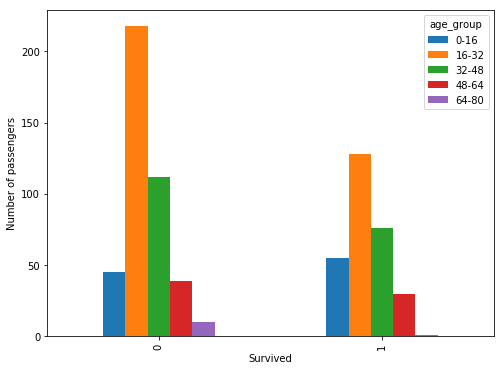

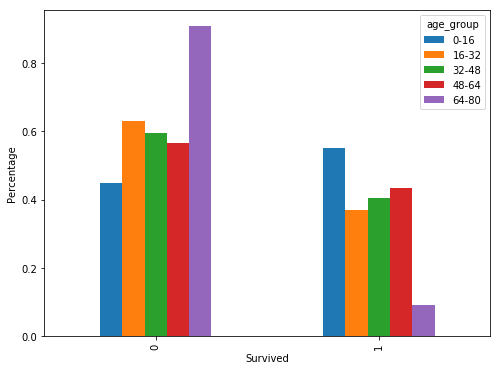

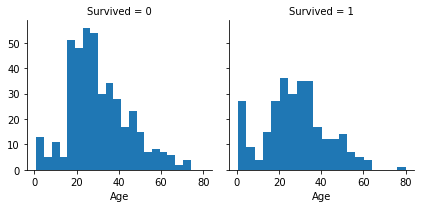

In [15]:
#Did young and old people survive with the same proportion?
age_range_width = int( (max(train_df["Age"])+1 - min(train_df["Age"])) / 5 )
bins_range = range( int(min(train_df["Age"])), int(max(train_df["Age"]))+1, age_range_width )
age_group_names = []
for i in bins_range:
    if i != bins_range[-1]:
        if i+1 == 1:
            i = 0
        names = str(i) + "-" + str(i+age_range_width)
        age_group_names.append(names)
    
train_df["age_group"] = pd.cut(train_df["Age"], bins=bins_range, labels=age_group_names)
fig, ax = plt.subplots(figsize=(8,6))
df_age_survived = train_df.groupby(["age_group","Survived"])["Pclass"].count().to_frame().pivot_table(columns="age_group", index="Survived", values="Pclass")
df_age_survived.plot(kind="bar", ax=ax)
plt.ylabel("Number of passengers");

#How old were most of passengers?
highest_survived_percentage = train_df[["Age", "Survived"]].groupby("Age").sum().sort_values(by="Survived", ascending=False).head(1)
print("Highest survived percentage: {}".format(int(highest_survived_percentage.index.values)))

sorted_age = train_df[["Age", "Survived"]].groupby("Age").sum().sort_values(by="Age", ascending=True)
#(train_df.loc[ (train_df.Age == 24) & (train_df.Survived == 1)])

#Did infants (< 4 years old) survive?
infants = sorted_age[sorted_age.index < 4]
print("Number of survived infant: {}".format(sum(infants.Survived)))

#Did oldest passengers (=>80 years old) survive?
oldest = sorted_age[sorted_age.index >=80]
print("Number of survived oldest: {}".format(sum(oldest.Survived)))

#Was there some age range for which people survived less?
df_age_survived_percentage = df_age_survived
df_age_survived_percentage = df_age_survived_percentage / df_age_survived_percentage.sum(axis=0)

fig, ax = plt.subplots(figsize=(8,6))
df_age_survived_percentage.plot(kind="bar", ax=ax)
plt.ylabel("Percentage");
# it seems age between 64 and 80 has the highest survived percentage.


#Use histograms to answer these questions. 
#Example: 

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);



FacetGrid is a Seaborn very usefull function that can be used to plot data under different persectives or variables (facets). 
Init parameters are: data that we want to visualize, and columns (facets) according to that we want to plot our data.
What we have done here is splitting the data into survived or not survived.
After iniriatization we can use map funtion to plot data or a function of data (histogram in this case) under these  variables.
In this case we are going to plot the histogram of ages of people who survived and who did not survived. 

In [16]:
#According to this plot, do you think that Age is relevant enough to be considered in the model? 
#If your answer is yes, do you think it is fully ready to be included in the model?
# yes, age seems relevant. but I think we should check other variables.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


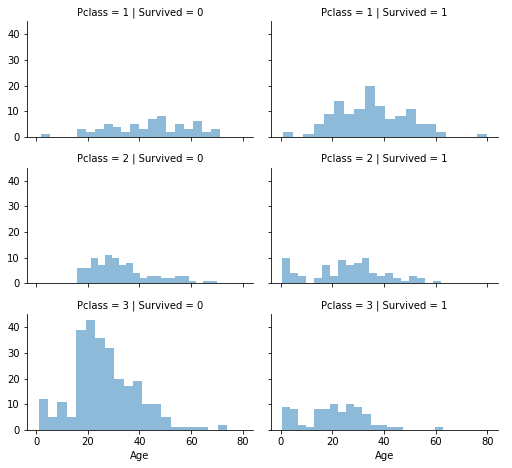

In [17]:
#Do the same combining more than one variable.
#Example:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#What do you observe?
# Pclass is very important variable if passenger is survived or not.

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


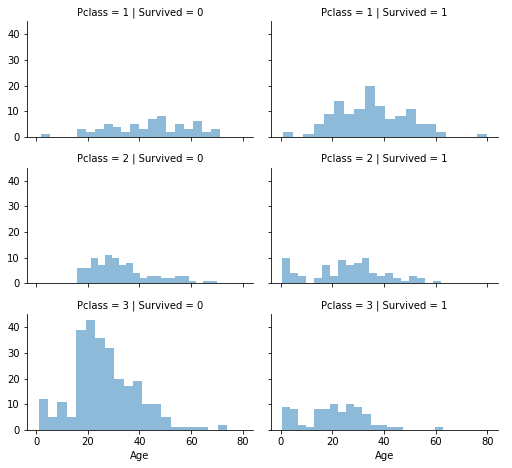

In [18]:
#Example:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Using this piece of code, answer the following questions:

In [ ]:
#Which Pclass had most passengers? Did most of them survive?
# Pclass-3 had the most passenges
# No, most of them did not survived.

#Did infant passengers in Pclass=2 and Pclass=3 mostly survived?
# Infant passengers in Pclass=3 mostly survived.

#Did ost passengers in Pclass=1 survived?
# yes

#Does Pclass varies in terms of Age distribution of passengers?
# no

In [ ]:
#Should PClass be included in the model?
# yes

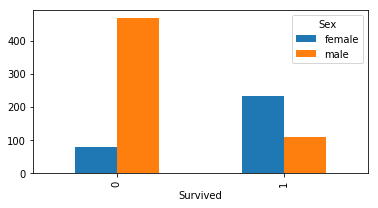

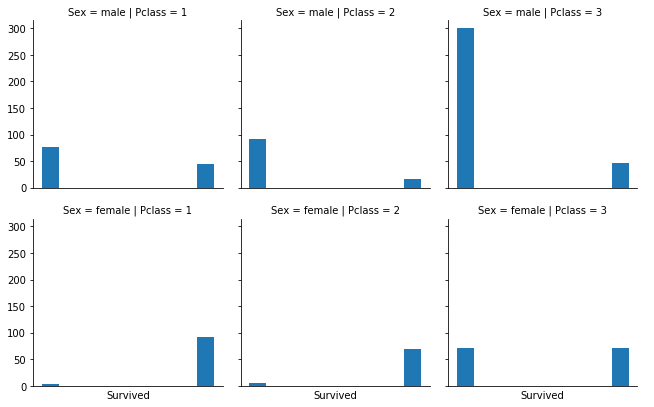

In [19]:
#Repeat the same process to answer the following questions:
#Did female passengers have much better survival rate than males? 
fig, ax = plt.subplots(figsize=(6,3))
train_df.groupby(["Sex","Survived"])["Title"].count().unstack(0).plot(kind="bar", ax=ax);
# No

#Is it true regardless ports of embarcation and PClass, 
#or do you observe higher male survival for certain ports and classes?
grid_2 = sns.FacetGrid(train_df, col='Pclass', row='Sex')
grid_2.map(plt.hist, 'Survived')
grid_2.set(xticks=train_df.Survived[-1:2:1])
grid_2.add_legend();
# Male survivaş percentage is higher each Pclass group.
# No 

#Clue: in the previous piece of code, subtitute plt.hist by sns.pointplot to improve your interpretation

In [ ]:
#According to that, is Sex feature relevant enough to be included in the model.
# Yes
#What about Embarked feature? Is this feature totally ready to be included in the model?

### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


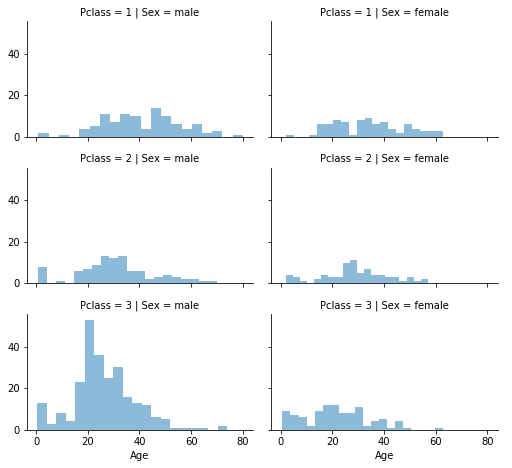

In [20]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [21]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [22]:
#Complete the code below to calculate guessed values of Ages for the six combinations and using the median:

In [23]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            if i == 0:
                sfm = "male"
            else: 
                sfm = "female"
                
            guess_df = dataset[(dataset['Sex'] == sfm) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            #age_mean = guess_df.mean()
            #age_std = guess_df.std()
            #age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            # Calculate the median here using the previous examples above
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess /0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            if i == 0:
                sfm = "male"
            else: 
                sfm = "female"
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == sfm) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


# Outliers detection

In [ ]:
#For what kind of variables does it make sense to detect outlier values?
#Categorical?
#Ordinal?
#Numerical?

# numercial

In [ ]:
#For these types of variables you identified, try to find if they really have outlier values
#Use boxplot
#If you detect the presence of outliers, calculate the corresponding thresholb by using 2*sima/3*sigma rule:
#Calculate the value obtained by subtracting 2 or 3 times the standard deviation to the mean of this variable
#Example: threshold = df[variable].mean()-2*df[variable].std()
#Remove those values in the dataset for which the value of this variable is higher than 2 or 3 times standard deviation
#Which threshold do you think is more appropiated for each variable?
#Do you think it is really critical to remove outliers in this case?

# it seems outliers can remove from dataset. The number of outliers is small. 
# I think removing them does not effect our dataset.

Orginal lenght of 'Age': 418, excluded outliers : 388


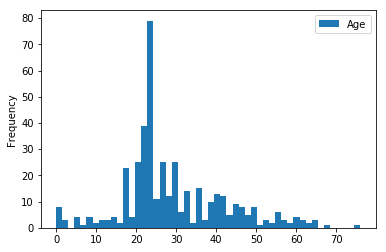

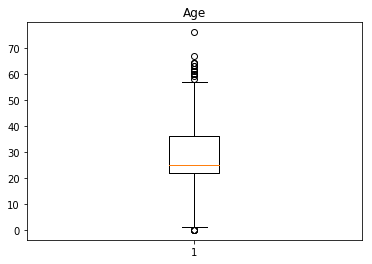

In [24]:
col_name = "Age"
dataset[col_name].plot(kind="hist", bins=50)
plt.legend();

fig1, ax1 = plt.subplots()
ax1.set_title(col_name)
ax1.boxplot(dataset[col_name])

threshold_age_min = dataset[col_name].mean() - 2*dataset[col_name].std()
threshold_age_max = dataset[col_name].mean() + 2*dataset[col_name].std()
threshold_age = dataset[(dataset[col_name] > threshold_age_min ) & ( dataset[col_name] < threshold_age_max ) ]

print("Orginal lenght of '{}': {}, excluded outliers : {}" . format(col_name,len(dataset.Age), len(threshold_age)))

Orginal lenght of 'SibSp': 418, excluded outliers : 407


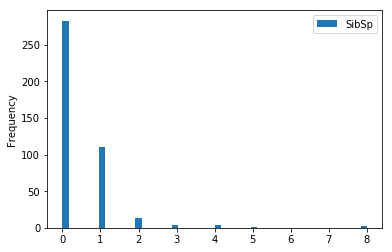

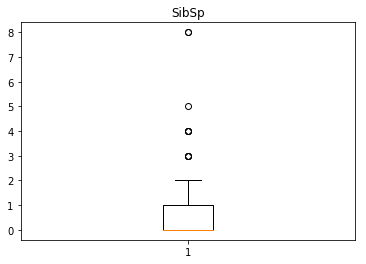

In [25]:
col_name = "SibSp"
dataset[col_name].plot(kind="hist", bins=50)
plt.legend();

fig1, ax1 = plt.subplots()
ax1.set_title(col_name)
ax1.boxplot(dataset[col_name])

threshold_age_min = dataset[col_name].mean() - 2*dataset[col_name].std()
threshold_age_max = dataset[col_name].mean() + 2*dataset[col_name].std()
threshold_age = dataset[(dataset[col_name] > threshold_age_min ) & ( dataset[col_name] < threshold_age_max ) ]

print("Orginal lenght of '{}': {}, excluded outliers : {}" . format(col_name,len(dataset.Age), len(threshold_age)))

Orginal lenght of 'Parch': 418, excluded outliers : 409


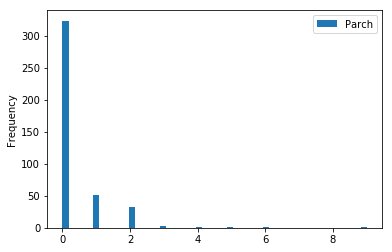

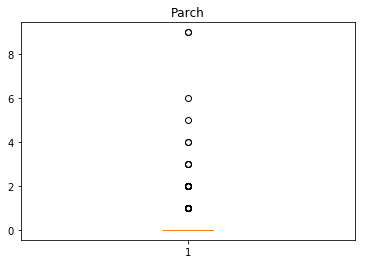

In [26]:
col_name = "Parch"
dataset[col_name].plot(kind="hist", bins=50)
plt.legend();

fig1, ax1 = plt.subplots()
ax1.set_title(col_name)
ax1.boxplot(dataset[col_name])

threshold_age_min = dataset[col_name].mean() - 2*dataset[col_name].std()
threshold_age_max = dataset[col_name].mean() + 2*dataset[col_name].std()
threshold_age = dataset[(dataset[col_name] > threshold_age_min ) & ( dataset[col_name] < threshold_age_max ) ]

print("Orginal lenght of '{}': {}, excluded outliers : {}" . format(col_name,len(dataset.Age), len(threshold_age)))